<a href="https://colab.research.google.com/github/AzzahraFebia/Big-Data/blob/main/Project_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
from google.colab import files
uploaded = files.upload()


Saving cafe.us.txt to cafe.us.txt


In [108]:
# Load Dataset

import pandas as pd

df = pd.read_csv('/content/cafe.us.txt')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2011-05-02,50.41,NaN,50.41,50.98,6900.0,0.0
1,2011-05-03,54.95,54.95,50.98,51.05,8800.0,0.0
2,2011-05-04,49.63,49.63,48.80,49.13,10051.0,0.0
3,2011-05-05,48.24,NaN,47.75,47.75,6451.0,0.0
4,2011-05-06,48.93,NaN,48.18,48.27,10740.0,0.0


In [109]:
# Cek Missing Value

import pandas as pd

df = pd.read_csv('/content/cafe.us.txt')
print(df.isna().sum())

Date        0
Open        1
High       57
Low         3
Close      36
Volume      7
OpenInt    12
dtype: int64


**CLEANING DATASET**

In [110]:
# Handling Missing Value

df['Open'] = df['Open'].fillna(df['Open'].mean())
df['High'] = df['High'].fillna(df['High'].mean())
df['Low'] = df['Low'].fillna(df['Low'].mean())
df['Close'] = df['Close'].fillna(df['Close'].mean())
df['Volume'] = df['Volume'].fillna(df['Volume'].median())
df['OpenInt'] = df['OpenInt'].fillna(0)

print("Missing sesudah:", df.isna().sum())

Missing sesudah: Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64


In [111]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2011-05-02,50.41,21.883056,50.41,50.98,6900.0,0.0
1,2011-05-03,54.95,54.950000,50.98,51.05,8800.0,0.0
2,2011-05-04,49.63,49.630000,48.80,49.13,10051.0,0.0
3,2011-05-05,48.24,21.883056,47.75,47.75,6451.0,0.0
4,2011-05-06,48.93,21.883056,48.18,48.27,10740.0,0.0


In [112]:
# Remove Duplicates
print("Jumlah baris sebelum hapus duplikat :", len(df))
df.drop_duplicates(inplace=True)
print("Jumlah baris setelah hapus duplikat :", len(df))

Jumlah baris sebelum hapus duplikat : 1253
Jumlah baris setelah hapus duplikat : 1253


**NORMALISASI SEMUA KOLOM**

In [113]:
# Normalisasi

from sklearn.preprocessing import MinMaxScaler
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']

minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df_minmax[numeric_cols])

print("=== DATA AWAL ===")
print(df.head())

print("\n=== DATA SETELAH NORMALISASI (MinMax) ===")
print(df_minmax.head())

=== DATA AWAL ===
         Date   Open       High    Low  Close   Volume  OpenInt
0  2011-05-02  50.41  21.883056  50.41  50.98   6900.0      0.0
1  2011-05-03  54.95  54.950000  50.98  51.05   8800.0      0.0
2  2011-05-04  49.63  49.630000  48.80  49.13  10051.0      0.0
3  2011-05-05  48.24  21.883056  47.75  47.75   6451.0      0.0
4  2011-05-06  48.93  21.883056  48.18  48.27  10740.0      0.0

=== DATA SETELAH NORMALISASI (MinMax) ===
         Date      Open      High       Low     Close    Volume  OpenInt
0  2011-05-02  0.893702  0.223965  0.985302  0.998193  0.097184      0.0
1  2011-05-03  1.000000  1.000000  1.000000  1.000000  0.123949      0.0
2  2011-05-04  0.875439  0.875147  0.943785  0.950425  0.141571      0.0
3  2011-05-05  0.842894  0.223965  0.916710  0.914793  0.090859      0.0
4  2011-05-06  0.859049  0.223965  0.927798  0.928219  0.151277      0.0


**CEK STRUKTUR DATASET**

In [114]:
import pandas as pd

print(df.head())

# Lihat informasi kolom
print("\nInfo dataset:")
print(df.info())


         Date   Open       High    Low  Close   Volume  OpenInt
0  2011-05-02  50.41  21.883056  50.41  50.98   6900.0      0.0
1  2011-05-03  54.95  54.950000  50.98  51.05   8800.0      0.0
2  2011-05-04  49.63  49.630000  48.80  49.13  10051.0      0.0
3  2011-05-05  48.24  21.883056  47.75  47.75   6451.0      0.0
4  2011-05-06  48.93  21.883056  48.18  48.27  10740.0      0.0

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1253 non-null   object 
 1   Open     1253 non-null   float64
 2   High     1253 non-null   float64
 3   Low      1253 non-null   float64
 4   Close    1253 non-null   float64
 5   Volume   1253 non-null   float64
 6   OpenInt  1253 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.7+ KB
None


**CLEANING KOLOM TANGGAL (DATE)**

In [115]:
# Ubah Date jadi datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Hapus baris yang Date-nya kosong (kalau ada)
df = df.dropna(subset=['Date'])

# Urutkan data berdasarkan tanggal
df = df.sort_values('Date').reset_index(drop=True)

print(df.head())


        Date   Open       High    Low  Close   Volume  OpenInt
0 2011-05-02  50.41  21.883056  50.41  50.98   6900.0      0.0
1 2011-05-03  54.95  54.950000  50.98  51.05   8800.0      0.0
2 2011-05-04  49.63  49.630000  48.80  49.13  10051.0      0.0
3 2011-05-05  48.24  21.883056  47.75  47.75   6451.0      0.0
4 2011-05-06  48.93  21.883056  48.18  48.27  10740.0      0.0


**HANDLE MISSING VALUES KOLOM NUMERIK (semisal masih ada NaN)**

In [116]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [117]:
print(df.head())

        Date   Open       High    Low  Close   Volume  OpenInt
0 2011-05-02  50.41  21.883056  50.41  50.98   6900.0      0.0
1 2011-05-03  54.95  54.950000  50.98  51.05   8800.0      0.0
2 2011-05-04  49.63  49.630000  48.80  49.13  10051.0      0.0
3 2011-05-05  48.24  21.883056  47.75  47.75   6451.0      0.0
4 2011-05-06  48.93  21.883056  48.18  48.27  10740.0      0.0


**PEMILIHAN KOLOM UNTUK PREDIKSI**

In [118]:
# Pilih Kolom yang Dipakai
data = df[['Date', 'Close']].copy()
print(data.head())


        Date  Close
0 2011-05-02  50.98
1 2011-05-03  51.05
2 2011-05-04  49.13
3 2011-05-05  47.75
4 2011-05-06  48.27


**NORMALISASI CLOSE (closing price) UNTUK LSTM**

In [119]:
# Normalisasi Data dengan MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(data[['Close']])

print(scaled_close[:5])


[[0.99819257]
 [1.        ]
 [0.95042475]
 [0.91479253]
 [0.92821916]]


**MEMBENTUK SEQUENCE TIME SERIES UNTUK MODEL LSTM**

In [120]:
# Membuat Sequence untuk Input LSTM

sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_close)):
    X.append(scaled_close[i-sequence_length:i])
    y.append(scaled_close[i])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1193, 60, 1)
y shape: (1193, 1)


**PEMBAGIAN DATA TRAINING DAN TESTING**

In [121]:
# Train-Test Split (80%-20%)

train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (954, 60, 1)
Test : (239, 60, 1)


**MEMBANGUN ARSITEKTUR MODEL LSTM**

In [122]:
# Membangun model LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
# Layer 1
model.add(LSTM(64, return_sequences=True, input_shape=(60, 1)))

# Layer 2
model.add(LSTM(32, return_sequences=False))

# Layer 3
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

**TRAINING MODEL LSTM (MODELING)**

In [123]:
# Training Model

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0308 - val_loss: 2.8958e-04
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0031 - val_loss: 4.5734e-06
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0031 - val_loss: 1.8205e-04
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0022 - val_loss: 1.4359e-05
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0025 - val_loss: 1.3803e-04
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0037 - val_loss: 5.7167e-05
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0028 - val_loss: 4.7148e-05
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0027 - val_loss: 6.8462e-05
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0023 - val_loss: 3.2809e-04
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0029 - val_loss: 2.7312e-04
Epoch 12/20
27/27 ━━━━━

**PREDIKSI TEST SET**

In [124]:
# Prediksi & Invers Normalisasi

pred_scaled = model.predict(X_test)

# Invers normalisasi (balikin ke angka asli)
pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


**VISUALISASI HASIL PREDIKSI VS AKTUAL**

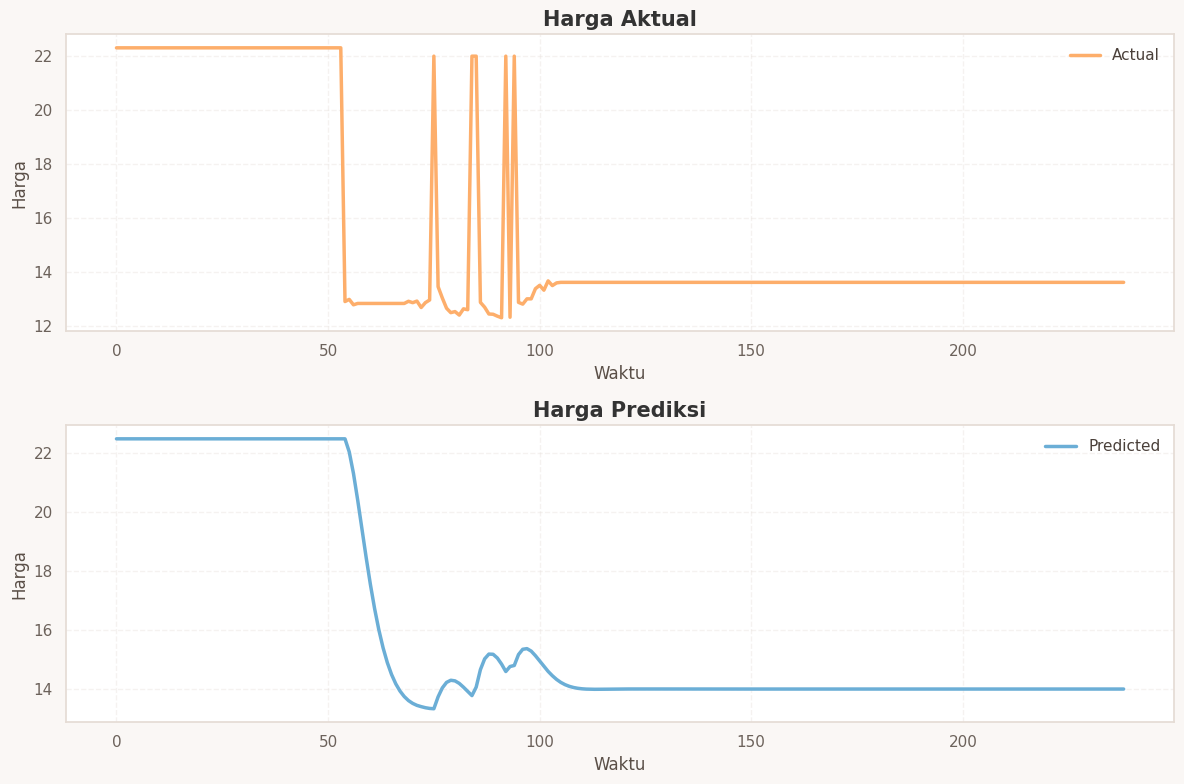

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# ==== CUSTOM PASTEL THEME ====
plt.rcParams['figure.facecolor'] = '#faf7f5'     # soft cream background
plt.rcParams['axes.facecolor']   = '#ffffff'     # white panel
plt.rcParams['axes.edgecolor']   = '#e5dcd5'
plt.rcParams['axes.labelcolor']  = '#5a4f47'
plt.rcParams['xtick.color']      = '#6c625b'
plt.rcParams['ytick.color']      = '#6c625b'
plt.rcParams['text.color']       = '#4a403a'
plt.rcParams['font.size']        = 12
plt.rcParams['grid.color']       = '#e6dfda'

plt.figure(figsize=(12,8))

# --- Grafik 1: ACTUAL ---
plt.subplot(2,1,1)
plt.plot(actual, label='Actual', color="#fdae6b", linewidth=2.5)
plt.title("Harga Aktual", fontsize=15, fontweight='bold')
plt.xlabel("Waktu")
plt.ylabel("Harga")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(frameon=False)

# --- Grafik 2: PREDICTED ---
plt.subplot(2,1,2)
plt.plot(pred, label='Predicted', color="#6baed6", linewidth=2.5)
plt.title("Harga Prediksi", fontsize=15, fontweight='bold')
plt.xlabel("Waktu")
plt.ylabel("Harga")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(frameon=False)

plt.tight_layout()
plt.show()


**PREDIKSI MASA DEPAN**

Congrats!! Data berhasil diload!
Akurasi Model (R-Squared): 0.43

=== HASIL PREDIKSI 5 PERIODE KE DEPAN ===
Periode ke-1: Rp 13.32
Periode ke-2: Rp 13.30
Periode ke-3: Rp 13.29
Periode ke-4: Rp 13.27
Periode ke-5: Rp 13.26

Grafik berhasil dibuat! Cek file 'grafik_prediksi_kelompok.png' di folder.


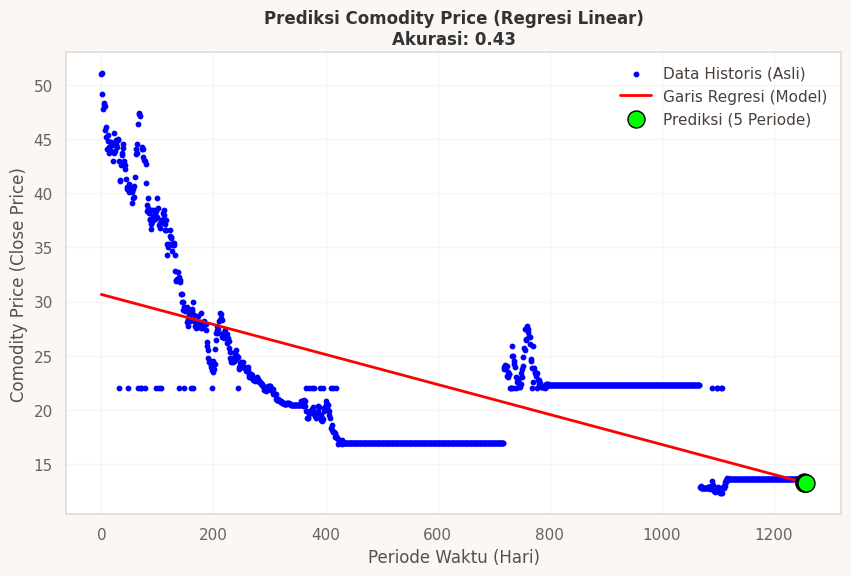

In [132]:
# PREDIKSI MENGGUNAKAN LINEAR REGRESSION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Chapter 1: Preparing Data (Import)
nama_file = 'cafe.us.txt'

try:
    df = pd.read_csv(nama_file, sep=',')

    # cleaning
    df['Close'] = df['Close'].fillna(df['Close'].mean())

    # Change date format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # errors='coerce' menambah safety
    df = df.dropna(subset=['Date'])

    df['Hari_Ke'] = np.arange(len(df)).reshape(-1, 1) # variabel X (Waktu)
    y = df['Close'].values # variabel Y (Harga)
    X = df[['Hari_Ke']].values

    print("Congrats!! Data berhasil diload!")

    # Chapter 2: Training Model
    # Straight Line is the best way
    model_reg = LinearRegression()
    model_reg.fit(X, y)

    # (R-Squared)
    akurasi = model_reg.score(X, y)
    print(f"Akurasi Model (R-Squared): {akurasi:.2f}")

    # Chapter 3: Predictions (5 days)
    hari_terakhir = df['Hari_Ke'].iloc[-1]
    X_masa_depan = np.array([[hari_terakhir + i] for i in range(1, 6)]) # 5 Periode ke depan

    # Komputer meramal harga di 5 hari tersebut
    prediksi_harga = model_reg.predict(X_masa_depan)

    # Show Output
    print("\n=== HASIL PREDIKSI 5 PERIODE KE DEPAN ===")
    for i, harga in enumerate(prediksi_harga, 1):
        print(f"Periode ke-{i}: Rp {harga:.2f}")

    # Chapter 4: Visualisasi Presentasi
    plt.figure(figsize=(10, 6))

    # 1. Gambar data yang asli
    plt.scatter(X, y, color='blue', label='Data Historis (Asli)', s=10)

    # 2. Gambar garis regresi
    plt.plot(X, model_reg.predict(X), color='red', linewidth=2, label='Garis Regresi (Model)')

    # 3. 5 titik prediksi masa depan
    plt.scatter(X_masa_depan, prediksi_harga, color='lime', s=150, edgecolors='black', label='Prediksi (5 Periode)', zorder=5)

    plt.title(f'Prediksi Comodity Price (Regresi Linear)\nAkurasi: {akurasi:.2f}')
    plt.xlabel('Periode Waktu (Hari)')
    plt.ylabel('Comodity Price (Close Price)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.savefig('grafik_prediksi_kelompok.png')
    print("\nGrafik berhasil dibuat! Cek file 'grafik_prediksi_kelompok.png' di folder.")
    plt.show()

except FileNotFoundError:
    print("ERROR: File tidak ditemukan! Pastikan nama file benar dan sudah diupload.")
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

In [127]:
# PREDIKSI MENGGUNAKAN LSTM

from sklearn.preprocessing import MinMaxScaler
import numpy as np

close_prices = df['Close'].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(close_prices)

def predict_future(steps, model, last_sequence, scaler):
    future_scaled = []
    seq = last_sequence.copy()

    for _ in range(steps):
        pred_scaled = model.predict(seq.reshape(1, 60, 1), verbose=0)
        future_scaled.append(pred_scaled[0][0])
        seq = np.append(seq[1:], pred_scaled).reshape(60,1)

    future_real = scaler.inverse_transform(np.array(future_scaled).reshape(-1,1))
    return future_real

# Ambil 60 hari terakhir untuk prediksi
last_seq = scaled_close[-60:]

# Prediksi multi-periode
pred_7d    = predict_future(7, model, last_seq, scaler)
pred_5d    = predict_future(5, model, last_seq, scaler)
pred_30d   = predict_future(30, model, last_seq, scaler)
pred_90d   = predict_future(90, model, last_seq, scaler)
pred_120d  = predict_future(120, model, last_seq, scaler)
pred_180d  = predict_future(180, model, last_seq, scaler)
pred_365d  = predict_future(365, model, last_seq, scaler)

**VISUALISASI**

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set_style("darkgrid")
sns.set_palette("muted")

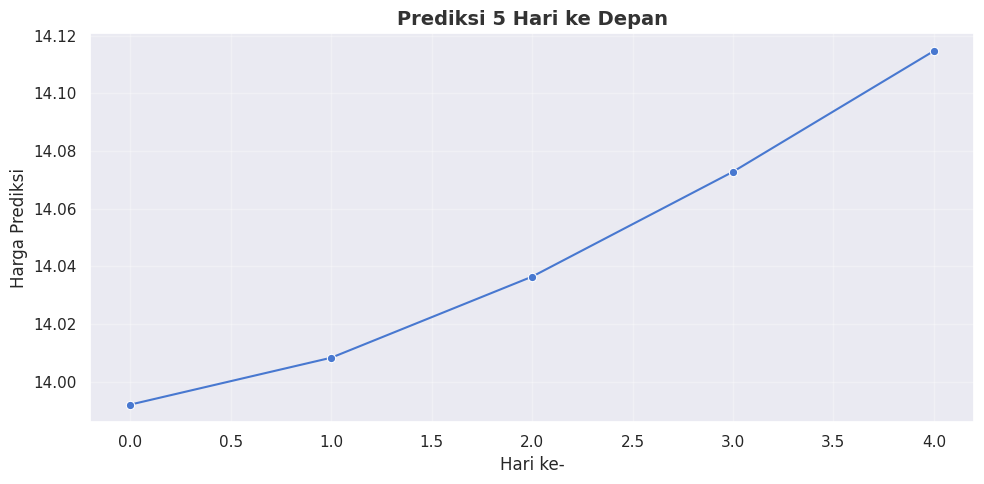

In [134]:
# Grafik prediksi 5 hari
plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(pred_5d)), y=pred_5d.flatten(), marker='o')
plt.title("Prediksi 5 Hari ke Depan", fontsize=14, weight='bold')
plt.xlabel("Hari ke-", fontsize=12)
plt.ylabel("Harga Prediksi", fontsize=12)
plt.tight_layout()
plt.show()


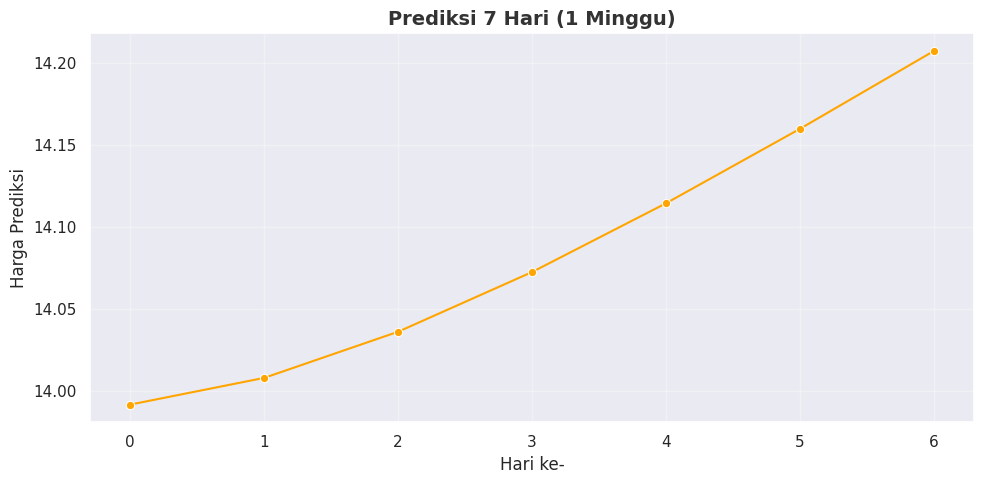

In [135]:
# Grafik prediksi 7 hari
plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(pred_7d)), y=pred_7d.flatten(), marker='o', color="orange")
plt.title("Prediksi 7 Hari (1 Minggu)", fontsize=14, weight='bold')
plt.xlabel("Hari ke-")
plt.ylabel("Harga Prediksi")
plt.tight_layout()
plt.show()


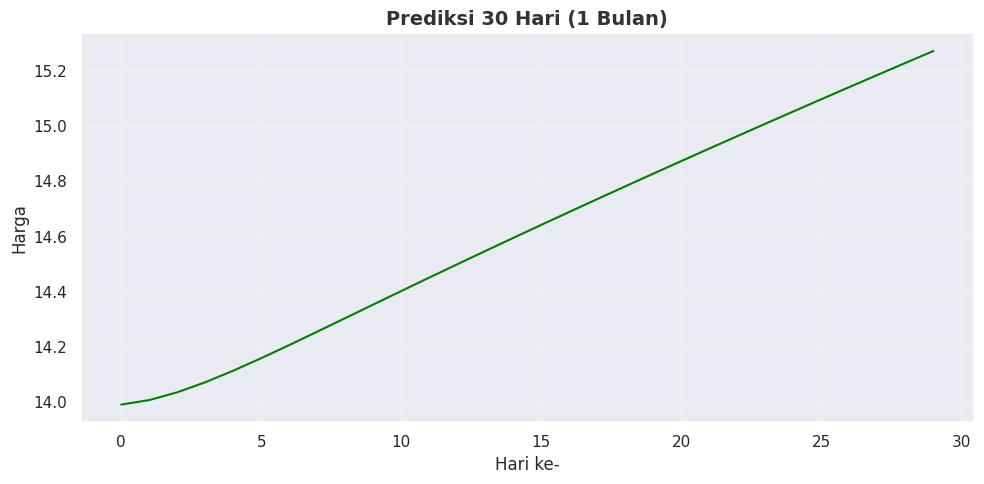

In [136]:
# Grafik prediksi 30 hari
plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(pred_30d)), y=pred_30d.flatten(), color="green")
plt.title("Prediksi 30 Hari (1 Bulan)", fontsize=14, weight='bold')
plt.xlabel("Hari ke-")
plt.ylabel("Harga")
plt.tight_layout()
plt.show()

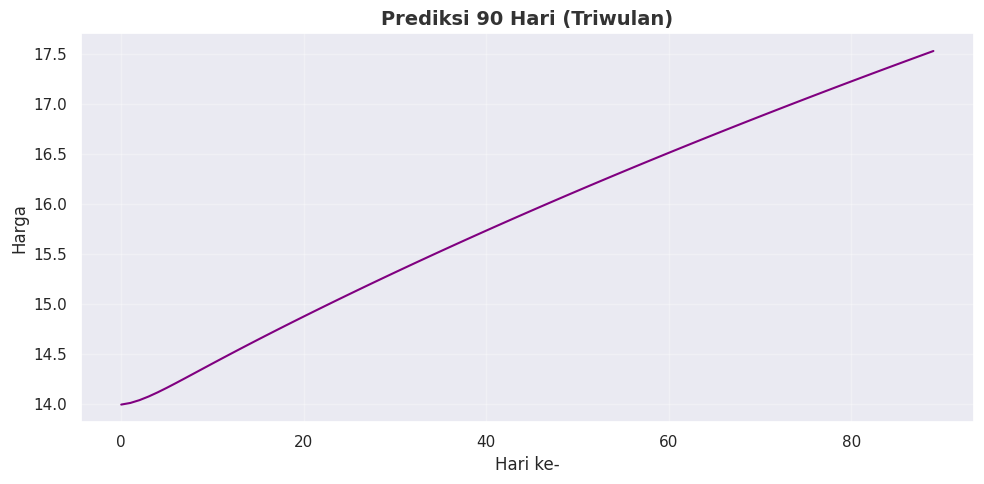

In [137]:
# Grafik prediksi 90 hari
plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(pred_90d)), y=pred_90d.flatten(), color="purple")
plt.title("Prediksi 90 Hari (Triwulan)", fontsize=14, weight='bold')
plt.xlabel("Hari ke-")
plt.ylabel("Harga")
plt.tight_layout()
plt.show()

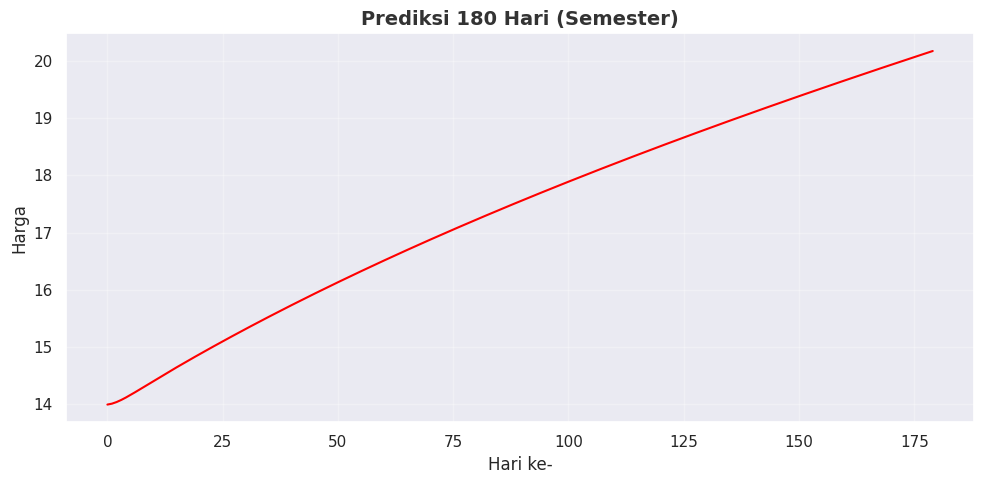

In [138]:
# Grafik prediksi 180 hari
plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(pred_180d)), y=pred_180d.flatten(), color="red")
plt.title("Prediksi 180 Hari (Semester)", fontsize=14, weight='bold')
plt.xlabel("Hari ke-")
plt.ylabel("Harga")
plt.tight_layout()
plt.show()

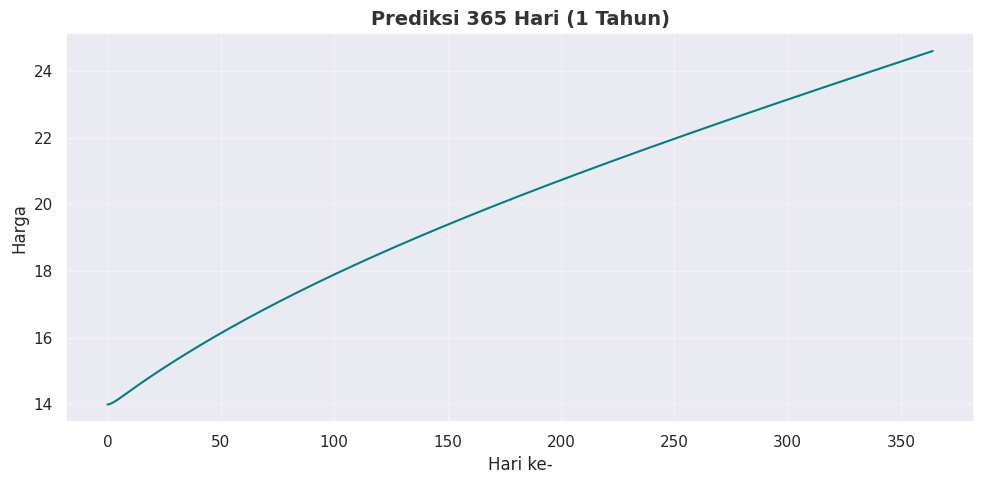

In [139]:
# Grafik prediksi 365 hari
plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(pred_365d)), y=pred_365d.flatten(), color="teal")
plt.title("Prediksi 365 Hari (1 Tahun)", fontsize=14, weight='bold')
plt.xlabel("Hari ke-")
plt.ylabel("Harga")
plt.tight_layout()
plt.show()